In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 126s 1us/step


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 39s 23ms/step - loss: 1.5228 - accuracy: 0.4436 - val_loss: 1.2236 - val_accuracy: 0.5572
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1484 - accuracy: 0.5926 - val_loss: 1.0323 - val_accuracy: 0.6334
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9854 - accuracy: 0.6524 - val_loss: 1.0029 - val_accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8927 - accuracy: 0.6874 - val_loss: 0.9104 - val_accuracy: 0.6846
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8199 - accuracy: 0.7134 - val_loss: 0.8845 - val_accuracy: 0.6929
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7553 - accuracy: 0.7358 - val_loss: 0.8520 - val_accuracy: 0.7079
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7074 - accuracy: 0.7539 - val_loss: 0.8493 -

313/313 - 2s - loss: 0.9310 - accuracy: 0.6956 - 2s/epoch - 7ms/step


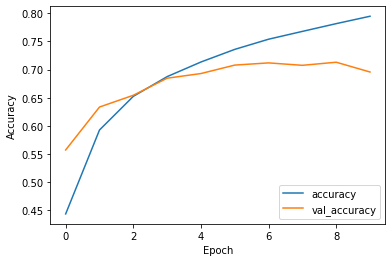

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)